In [2]:
import gym

In [3]:
env = gym.make("Taxi-v3").env

In [4]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
print("Action Space ", env.action_space)
print('Actions are: ')
print('0 = south')
print('1 = north')
print('2 = east')
print('3 = west')
print('4 = pickup')
print('5 = dropoff')
print("State Space {}".format(env.observation_space))

Action Space  Discrete(6)
Actions are: 
0 = south
1 = north
2 = east
3 = west
4 = pickup
5 = dropoff
State Space Discrete(500)


In [6]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
env.reset()  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 3122
Penalties incurred: 1039


In [9]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.01)

print('Path taken by a random agent')        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 3122
State: 475
Action: 5
Reward: 20


In [11]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [12]:
import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1 # Learning rate
gamma = 0.6 # Discount factor
epsilon = 0.1 # Exploration (with epsilon prob. we explore)

# For plotting metrics
all_epochs = []
all_penalties = []

num_episodes = 100000

for i in range(1, num_episodes+1):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done: # looping through an episode through completion
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



In [13]:
env.s = 328
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [14]:
print('Action values of the illustrated state: ')
print('South: ', q_table[328][0])
print('North: ', q_table[328][1])
print('East: ', q_table[328][2])
print('West: ', q_table[328][3])
print('Pickup: ', q_table[328][4])
print('Dropoff: ', q_table[328][5])

Action values of the illustrated state: 
South:  -2.4092583488310013
North:  -2.273251840000004
East:  -2.3997745595106617
West:  -2.359705589616065
Pickup:  -9.944649578361823
Dropoff:  -11.03536727303251


In [15]:
total_epochs, total_penalties = 0, 0
episodes = 100
eval_rewards = []

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    episode_reward = 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        episode_reward += reward

        if reward == -10:
            penalties += 1

        epochs += 1
    
    eval_rewards.append(episode_reward)

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.78
Average penalties per episode: 0.0


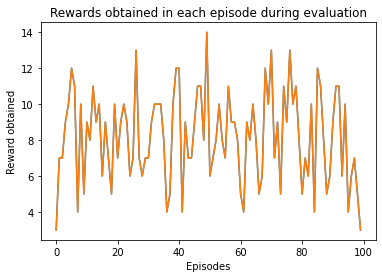

In [16]:
import matplotlib.pyplot as plt

plt.plot(eval_rewards)
plt.xlabel('Episodes')
plt.ylabel('Reward obtained')
plt.title('Rewards obtained in each episode during evaluation')
plt.plot(eval_rewards)
plt.show()

In [38]:
# Visualize actions taken by Reinforcement Learning Agent

frames = []

done = False
state = env.reset()

while not done:
    action = action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

def print_eval_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.2)

print('Path taken by a trained agent')        
print_eval_frames(frames)



+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 13
State: 85
Action: 5
Reward: 20
